In [1]:
###############################################################################
#                       Load Library                                          #
###############################################################################

#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
# Preparation  
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
# Import StandardScaler from scikit-learn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer,IterativeImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline,FeatureUnion
from sklearn.manifold import TSNE
# Import train_test_split()
# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score,recall_score
from sklearn.metrics import make_scorer,mean_absolute_error
from sklearn.metrics import mean_squared_error,classification_report,f1_score
from sklearn.metrics import roc_curve,confusion_matrix
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.linear_model import LogisticRegression

import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.metrics import AUC
#import smogn
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone,ClassifierMixin
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif,chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
import lightgbm as lgbm
# from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBClassifier,XGBRegressor
from sklearn import set_config
from itertools import combinations
# Cluster :
from sklearn.cluster import MiniBatchKMeans
#from yellowbrick.cluster import KElbowVisualizer
#import smong 
# import category_encoders as ce
import warnings
#import optuna 
from joblib import Parallel, delayed
import joblib 
from sklearn import set_config
from typing import List, Optional, Union
import itertools
# import shap

# Imbalanced data 
from imblearn.datasets import fetch_datasets
# to correctly set up the cross-validation
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import (
    RandomUnderSampler,
    CondensedNearestNeighbour,
    TomekLinks,
    OneSidedSelection,
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours,
    AllKNN,
    NeighbourhoodCleaningRule,
    NearMiss,
    InstanceHardnessThreshold
)
from imblearn.over_sampling import (
    RandomOverSampler,
    SMOTE,
    ADASYN,
    BorderlineSMOTE,
    SVMSMOTE,
)
from tqdm import tqdm 
import gc
set_config(display='diagram')
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [2]:
TRAIN_DATA_PATH = "./drive/MyDrive/Kaggle_data/Deep_learing_part1_MLP_CON1/train.csv"
TRAIN_LABELS_PATH = "./drive/MyDrive/Kaggle_data/Deep_learing_part1_MLP_CON1/train_labels.csv"
TEST_DATA_PATH = "./drive/MyDrive/Kaggle_data/Deep_learing_part1_MLP_CON1/test.csv"
SAMPLE_SUBMISSION = "./drive/MyDrive/Kaggle_data/Deep_learing_part1_MLP_CON1/sample_submission.csv"

INDEX = "sequence"
TARGET = "state"
SENSORS = ['sensor_{:2d}'.format(x) for x in range(0, 13)]

In [8]:
%%time
def read_data():
  train = pd.read_csv(TRAIN_DATA_PATH, index_col=INDEX)
  test = pd.read_csv(TEST_DATA_PATH, index_col=INDEX)
  labels = pd.read_csv(TRAIN_LABELS_PATH, index_col=INDEX)
  submission = pd.read_csv(SAMPLE_SUBMISSION, index_col=INDEX)
  return train, test, labels, submission

train, test, labels, submission = read_data()

CPU times: user 7.46 s, sys: 903 ms, total: 8.36 s
Wall time: 14.5 s


In [9]:
train.head()

,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
sequence,,,,,,,,,,,,,,,
0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492
0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147
0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241
0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359


In [12]:
labels.head()

,state
sequence,
0,0
1,1
2,1
3,1
4,1


In [20]:
def reduce_mem_usage(df:pd.DataFrame)->pd.DataFrame:
  start_mem = df.memory_usage().sum() / 1024**2
  print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

  for col in tqdm(df.columns):
        col_type = df[col].dtype
        name =df[col].dtype.name 

        if col_type != object and col_type.name != 'category':
        #if name != "category":    
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

  end_mem = df.memory_usage().sum() / 1024**2
  print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
  print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
  return df

In [22]:
%%time

train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

Memory usage of dataframe is 190.20 MB


100%|██████████| 15/15 [00:00<00:00, 20.38it/s]


Memory usage after optimization is: 54.98 MB
Decreased by 71.1%
Memory usage of dataframe is 89.49 MB


100%|██████████| 15/15 [00:00<00:00, 51.64it/s]

Memory usage after optimization is: 25.87 MB
Decreased by 71.1%
CPU times: user 890 ms, sys: 134 ms, total: 1.02 s
Wall time: 1.11 s


In [33]:
%%time
FEATURES = SENSORS
num_features = len(FEATURES)

print(f"Number of features: {num_features}")

Number of features: 13
CPU times: user 1.79 ms, sys: 0 ns, total: 1.79 ms
Wall time: 1.99 ms


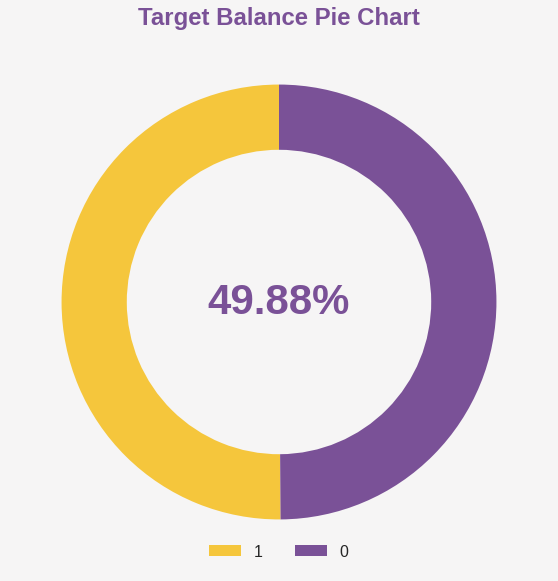

CPU times: user 142 ms, sys: 0 ns, total: 142 ms
Wall time: 141 ms


In [34]:
%%time
colors = ['#7A5197', '#BB5098', '#5344A9', '#F5C63C', '#F47F6B']
plt.subplots(figsize=(25, 10), facecolor="#f6f5f5")
plt.pie(labels['state'].value_counts(), startangle=90,
        wedgeprops={'width':0.3}, colors=['#F5C63C', '#7A5197'])
plt.title("Target Balance Pie Chart", loc='center', fontsize=24,
          color='#7A5197', fontweight="bold")
plt.text(0, 0, f"{labels['state'].value_counts()[0] / labels['state'].count()*100:.2f}%",
         ha='center', va='center', fontweight='bold', fontsize=42, color='#7A5197')
plt.legend(labels['state'].value_counts().index, ncol=2, facecolor='#f6f5f5',
           edgecolor='#f6f5f5', loc='lower center', fontsize=16)
plt.show()

In [35]:
cat_columns = train.select_dtypes(include=['category', 'object', 'bool']).columns
cat_columns

Index([], dtype='object')

In [36]:
num_columns = train.select_dtypes(exclude=['category', 'object', 'bool']).columns
num_columns

Index(['subject', 'step', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08',
       'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12'],
      dtype='object')

In [37]:
###############################################################################
#                         Define differrent Transformer                       #
###############################################################################
categorical_transformer_ohe = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', # 지정값, fill_value가 동반
                                  fill_value='MISSING')), # 결측치를 "MISSING"으로 채움
        ('encoder', OneHotEncoder())
    ]
)

numeric_transformer_power = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', PowerTransformer()) # 정규분포로 변환
    ]
)

numeric_transformer_ss = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

preprocessor_basic = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transformer_power, num_columns),
        ('categorical', categorical_transformer_ohe, cat_columns)
    ]
)

preprocessor_basic

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler',
                                                  PowerTransformer())]),
                                 Index(['subject', 'step', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08',
       'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('encoder', OneHotEncoder())]),
                                 Index([], dtype='object'))])

In [38]:
%%time
numeric_transformer_ss.fit(train[FEATURES])

KeyError: ignored